# Assessing Fit (Polynomial Regression)

## Import Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Import Data Type

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

## Load Data from CSV files

In [3]:
sales = pd.read_csv("kc_house_data.csv", dtype = dtype_dict)
train_data = pd.read_csv("kc_house_train_data.csv", dtype = dtype_dict)
test_data = pd.read_csv("kc_house_test_data.csv", dtype = dtype_dict)
valid_data = pd.read_csv("kc_house_valid_data.csv", dtype = dtype_dict)
set1 = pd.read_csv("kc_house_set_1_data.csv", dtype = dtype_dict)
set2 = pd.read_csv("kc_house_set_2_data.csv", dtype = dtype_dict)
set3 = pd.read_csv("kc_house_set_3_data.csv", dtype = dtype_dict)
set4 = pd.read_csv("kc_house_set_4_data.csv", dtype = dtype_dict)

## Polynomial Dataframe Function

In [4]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

## Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [5]:
sales = sales.sort_values(['sqft_living','price'])

Making a 1 degree polynomial with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. 

### Linear regression model for 1st power of squarefeet:

In [7]:
# Linear Regression Model
model1 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model1.fit(poly1_data.drop('price',1), poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept and coefficients of 1st power of sqft:

In [8]:
print("Coefficients: ", model1.intercept_)
coeffs = pd.DataFrame(list(zip(poly1_data.drop('price',1).columns,model1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  -43580.7430945


,features,estimated coefficients
0,power_1,280.623568


Let's visualize this linear model in scatter plot:

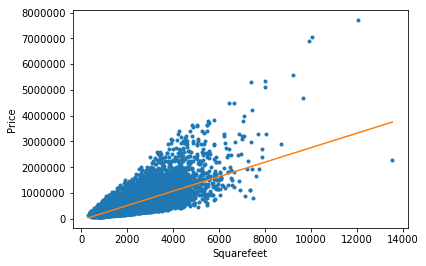

In [9]:
# Scatter plot of data (1st power of sqft)
plt.figure(0)
plt.plot(poly1_data[['power_1']], poly1_data[['price']],'.',
         poly1_data[['power_1']], model1.predict(poly1_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

### Linear regression model for 2nd degree of polynomial:

In [10]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
model2 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model2.fit(poly2_data.drop('price',1), poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept and coefficients of 2nd degree of polynomial model:

In [11]:
print("Coefficients: ", model2.intercept_)
coeffs = pd.DataFrame(list(zip(poly2_data.drop('price',1).columns,model2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  199222.279305


,features,estimated coefficients
0,power_1,67.994095
1,power_2,0.038581


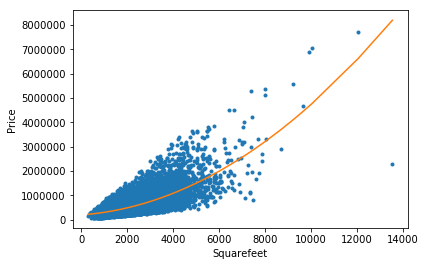

In [12]:
# Scatter plot of data (2nd power of sqft)
plt.figure(1)
plt.plot(poly2_data[['power_1']], poly2_data[['price']],'.',
         poly2_data[['power_1']], model2.predict(poly2_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

### Linear regression model for 3rd degree of polynomial:

In [13]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
model3 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model3.fit(poly3_data.drop('price',1), poly3_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept and coefficients of 3rd degree of polynomial model:

In [14]:
print("Coefficients: ", model3.intercept_)
coeffs = pd.DataFrame(list(zip(poly3_data.drop('price',1).columns,model3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  336819.748221


,features,estimated coefficients
0,power_1,-90.181986
1,power_2,0.087047
2,power_3,-0.000004


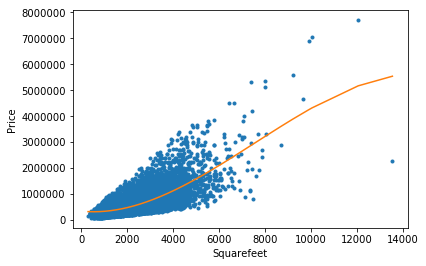

In [15]:
# Scatter plot of data (3rd power of sqft)
plt.figure(2)
plt.plot(poly3_data[['power_1']], poly3_data[['price']],'.',
         poly3_data[['power_1']], model3.predict(poly3_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

Linear regression model for 15th degree of polynomial:

In [16]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']
model15 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model15.fit(poly15_data.drop('price',1), poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept and coefficients of 15th degree of polynomial model:

In [17]:
print("Coefficients: ", model15.intercept_)
coeffs = pd.DataFrame(list(zip(poly15_data.drop('price',1).columns,model15.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  537116.329638


,features,estimated coefficients
0,power_1,4.564042e-91
1,power_2,6.917135e-51
2,power_3,-5.846688e-56
3,power_4,0.000000e+00
4,power_5,0.000000e+00
5,power_6,2.685752e-71
6,power_7,2.261476e-67
7,power_8,1.859003e-63
8,power_9,1.471441e-59
9,power_10,1.097710e-55


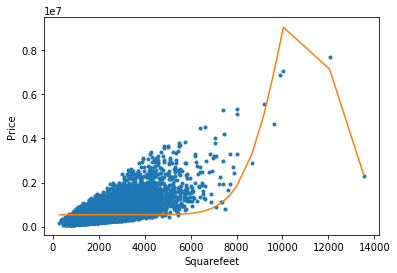

In [18]:
plt.figure(3)
plt.plot(poly15_data[['power_1']], poly15_data[['price']],'.',
         poly15_data[['power_1']], model15.predict(poly15_data.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.show()

## Linear Regression Model for subset data

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above).

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

### Set 1

In [19]:
poly_set1 = polynomial_dataframe(set1['sqft_living'], 15)
poly_set1['price'] = set1['price']
model_set1 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set1.fit(poly_set1.drop('price',1), poly_set1['price'])
print("Coefficients: ", model_set1.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set1.drop('price',1).columns,model_set1.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  539058.818668


,features,estimated coefficients
0,power_1,3.057942e-90
1,power_2,-1.693949e-49
2,power_3,-5.617676e-55
3,power_4,-4.978412e-60
4,power_5,0.000000e+00
5,power_6,1.103584e-70
6,power_7,8.377240e-67
7,power_8,6.234120e-63
8,power_9,4.491564e-59
9,power_10,3.069388e-55


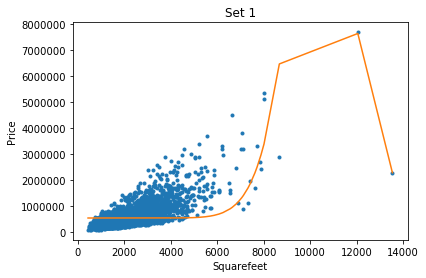

In [20]:
# Scatter plot of set1 data
plt.figure(4)
plt.plot(poly_set1[['power_1']], poly_set1[['price']],'.',
         poly_set1[['power_1']], model_set1.predict(poly_set1.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 1')
plt.show()

### Set 2

In [21]:
poly_set2 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set2['price'] = set2['price']
model_set2 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set2.fit(poly_set2.drop('price',1), poly_set2['price'])
print("Coefficients: ", model_set2.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set2.drop('price',1).columns,model_set2.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  506737.756227


,features,estimated coefficients
0,power_1,2.713359e-77
1,power_2,7.335411e-39
2,power_3,-1.850149e-44
3,power_4,8.437424e-50
4,power_5,0.000000e+00
5,power_6,0.000000e+00
6,power_7,3.645492e-55
7,power_8,1.504163e-51
8,power_9,5.760157e-48
9,power_10,1.957705e-44


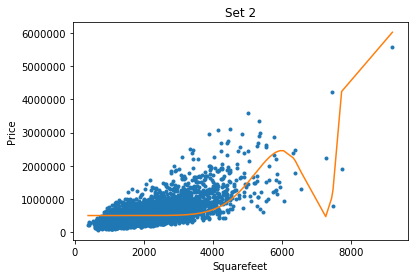

In [22]:
# Scatter plot of set 2 data
plt.figure(5)
plt.plot(poly_set2[['power_1']], poly_set2[['price']],'.',
         poly_set2[['power_1']], model_set2.predict(poly_set2.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 2')
plt.show()

### Set 3

In [23]:
poly_set3 = polynomial_dataframe(set3['sqft_living'], 15)
poly_set3['price'] = set3['price']
model_set3 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set3.fit(poly_set3.drop('price',1), poly_set3['price'])
print("Coefficients: ", model_set3.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set3.drop('price',1).columns,model_set3.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  530874.316653


,features,estimated coefficients
0,power_1,2.837519e-88
1,power_2,-7.802241e-49
2,power_3,-1.387672e-55
3,power_4,3.982730e-59
4,power_5,0.000000e+00
5,power_6,4.278950e-69
6,power_7,2.680096e-65
7,power_8,1.639114e-61
8,power_9,9.664350e-58
9,power_10,5.380447e-54


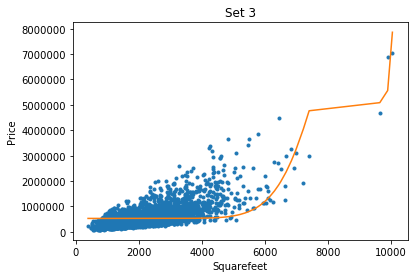

In [24]:
# Scatter plot of set 3 data
plt.figure(6)
plt.plot(poly_set3[['power_1']], poly_set3[['price']],'.',
         poly_set3[['power_1']], model_set3.predict(poly_set3.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 3')
plt.show()

### Set 4

In [25]:
poly_set4 = polynomial_dataframe(set2['sqft_living'], 15)
poly_set4['price'] = set4['price']
model_set4 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model_set4.fit(poly_set4.drop('price',1), poly_set4['price'])
print("Coefficients: ", model_set4.intercept_)
coeffs = pd.DataFrame(list(zip(poly_set4.drop('price',1).columns,model_set4.coef_)), columns = ['features', 'estimated coefficients'])
coeffs

Coefficients:  500603.525195


,features,estimated coefficients
0,power_1,2.813243e-77
1,power_2,7.605441e-39
2,power_3,-1.918256e-44
3,power_4,8.748021e-50
4,power_5,0.000000e+00
5,power_6,0.000000e+00
6,power_7,3.779698e-55
7,power_8,1.559534e-51
8,power_9,5.972199e-48
9,power_10,2.029772e-44


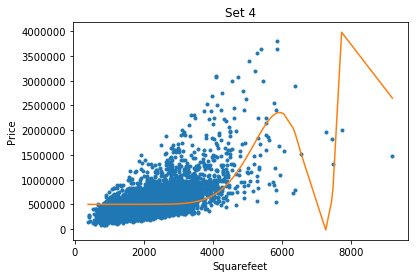

In [26]:
# Scatter plot of set 4 data
plt.figure(7)
plt.plot(poly_set4[['power_1']], poly_set4[['price']],'.',
         poly_set4[['power_1']], model_set4.predict(poly_set4.drop('price',1)),'-')
plt.xlabel('Squarefeet')
plt.ylabel('Price')
plt.title('Set 4')
plt.show()

## Selecting a Polynomial Degree

We will find optimum degree of polynomial by following process:

* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
* Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
* hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
* Add train_data['price'] to the polynomial SFrame
* Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
* Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

In [27]:
degree_rss_table =[]

for degree in range(1,16):
    data = polynomial_dataframe(train_data['sqft_living'], degree)
    data['price'] = train_data['price']
    model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    model.fit(data.drop('price',1), data['price'])
    validation_data = polynomial_dataframe(valid_data['sqft_living'], degree)
    val_pred = model.predict(data.drop('price',1))
    residuals = val_pred - data['price']
    RSS = (residuals**2).sum()
    
    print('Degree: %d / RSS: %.4g' % (degree, RSS))
    degree_rss_table.append((degree,RSS))

Degree: 1 / RSS: 7.07e+14
Degree: 2 / RSS: 6.177e+14
Degree: 3 / RSS: 6.177e+14
Degree: 4 / RSS: 6.176e+14
Degree: 5 / RSS: 6.176e+14
Degree: 6 / RSS: 6.162e+14
Degree: 7 / RSS: 6.176e+14
Degree: 8 / RSS: 6.378e+14
Degree: 9 / RSS: 6.848e+14
Degree: 10 / RSS: 7.52e+14
Degree: 11 / RSS: 8.261e+14
Degree: 12 / RSS: 8.972e+14
Degree: 13 / RSS: 1.143e+15
Degree: 14 / RSS: 1.166e+15
Degree: 15 / RSS: 1.183e+15


In [28]:
# Choosing the best model
sorted(degree_rss_table, key = lambda RSS: RSS[1])

[(6, 616209024361706.6),
 (7, 617631990814180.2),
 (4, 617637641573564.9),
 (5, 617649098972755.6),
 (3, 617670141211076.2),
 (2, 617681432824606.1),
 (8, 637786818418123.5),
 (9, 684830990648390.0),
 (1, 706999812596192.9),
 (10, 751989230809203.4),
 (11, 826146225747868.2),
 (12, 897225852501941.9),
 (13, 1143335158761442.2),
 (14, 1166042749408685.8),
 (15, 1183400438743908.2)]

Apply optimum model to Test set:

In [29]:
# Apply the model to Test Set
low_RSS_data = polynomial_dataframe(test_data['sqft_living'], degree)
low_RSS_data['price'] = test_data['price']
model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.fit(low_RSS_data.drop('price',1), low_RSS_data['price'])
test_pred = model.predict(low_RSS_data.drop('price',1))
residuals = test_pred - low_RSS_data['price']
RSS = (residuals**2).sum()
print('RSS on Test data for the model of degree 6: %.4g' % RSS)

RSS on Test data for the model of degree 6: 1.762e+14
